<a href="https://colab.research.google.com/github/Hills201/course-work-submission-NLP/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 1 — Dataset Description**

I utilized the Fake and Real News Dataset in this project, which was acquired from Kaggle (Ahmed, Traore, and Saad, 2017). This dataset consisted of two files, Fake.csv and True.csv, and it contained news stories classified as either false or true. Each entry comprised the article's title, main text, the subject/category, and publication date. To perform binary classification, the two files were loaded separately, and then labeled (0 for fake and 1 for real), and then merged into a single dataset. The rows with null values were eliminated to maintain data integrity.



To preprocess the data, the title and text boxes were combined into a new feature called combined_text, to have a more extensive and informative input sequence for processing. Other preprocessing procedures were implemented to standardize the textual data, including transforming text to lowercase, removing punctuation and non-alphabetic letters, discarding English stopwords, and executing lemmatization utilizing NLTK. These steps cut down on noise and let the models focus on more important patterns.



 An organized dataset, along with a good level of preprocessing, enables efficient  machine learning and deep learning models for this purpose.


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd

file_path = '/content/drive/MyDrive/Fake.csv'

try:
    df_fake = pd.read_csv(file_path)
    print("CSV file loaded successfully!")
    display(df_fake.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully!


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [39]:
import pandas as pd

file_path_true = '/content/drive/MyDrive/True.csv'

try:
    df_true = pd.read_csv(file_path_true)
    print("CSV file loaded successfully!")
    display(df_true.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path_true}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully!


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [40]:
df_true["label"] = 1   # Real news
df_fake["label"] = 0   # Fake news

df = pd.concat([df_true, df_fake], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [41]:
df.dropna(subset=["text"], inplace=True)

df["combined_text"] = df["title"] + " " + df["text"]


In [42]:
import re
import nltk
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["combined_text"].apply(clean_text)
df.head()
df["label"].value_counts()
df["clean_text"].str.len().describe()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_text
count,44898.000000
mean,1765.604659
std,1512.065830
min,22.000000
25%,919.000000
50%,1554.000000
75%,2192.000000
max,37930.000000


In [43]:
df.head()

,title,text,subject,date,label,combined_text,clean_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,BREAKING: GOP Chairman Grassley Has Had Enoug...,breaking gop chairman grassley enough demand t...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,Failed GOP Candidates Remembered In Hilarious...,failed gop candidate remembered hilarious mock...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,mike pences new dc neighbor hilariously trolli...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,California AG pledges to defend birth control ...,california ag pledge defend birth control insu...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,AZ RANCHERS Living On US-Mexico Border Destroy...,az rancher living usmexico border destroy nanc...


In [44]:

df["label"].value_counts()

,count
label,
0,23481
1,21417


# **Section 2 — Representation Learning**

To prepare the cleaned textual data for modeling, two different representation techniques will be implemented. The first is TF-IDF, which finds a balance between how often words are used and how rarely they are used. TF-IDF has been widely used in text classification tasks due to its efficiency and interpretability (Jurafsky and Martin, 2021). In this case, a TfidfVectorizer with a 10,000-word vocabulary and an n-gram range of (1, 2) is applied to get both single words and short phrases indicative of fake or real news.

The second one is designed for deep learning models and involves converting the  text into tokenized integer sequences using a   Keras Tokenizer. The vocabulary was set to a limit of 20,000 most frequent words, and to keep the input dimensions the same, sequences were padded to a set length. A dense, low-dimensional vector representation is learned during training by feeding these sequences into an Embedding layer. Such embeddings are known to capture semantic and contextual relationships between words that cannot be modelled using bag-of-words representations (Mikolov et al., 2013).

By implementing both sparse TF–IDF features and dense embedding-based sequences, this will  establish two different input pipelines. This allows for a more meaningful comparison between traditional linear models and deep learning architectures in the context of fake news detection.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


X = df["clean_text"].values
y = df["label"].values


X_train_text, X_test_text, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# TF–IDF vectoriser – similar to Lab06 Text Classification
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

X_train_tfidf.shape, X_test_tfidf.shape


((35918, 10000), (8980, 10000))

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_len = 300
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

X_train_pad.shape, X_test_pad.shape


((35918, 300), (8980, 300))

# **Section 3 — Algorithms**

There will be two different algorithm pipelines implemented for fake news detection. Firstly, a machine learning approach using logistic regression, and secondly, a deep learning approach using a long short-term memory (LSTM) network. The two models selected are supposed to provide a balanced comparison between linear classifiers and neural architectures.

The first pipeline uses TF-IDF vectorization followed by logistic regression. TF–IDF converts each document into a sparse vector based on how rarely terms are used (term importance), making it a good approach for feature representation for linear models. Logistic regression predicts class membership using a sigmoid function and learns an optimal separating hyperplane by minimizing a regularized loss function. Due to its stability, scalability, and interpretability, TF-IDF combined with logistic regression in misinformation detection tasks should provide good results. The model was trained with a maximum of 2000 iterations to ensure convergence given the large feature space. This approach should be particularly effective where real and fake news contain different lexical patterns.

The second pipeline uses a long short-term memory (LSTM) network, which is a type of recurrent neural network made to solve the issues with ordinary RNNs that cause gradients to vanish. LSTM has memory cells and gating mechanisms, such as input, forget, and output gates, that can control how information flows. In this case, an embedding layer will be used to transmit tokenized integer sequences through the network. This should allow the network to learn dense vector representations before the LSTM layer examines how things are related to each other. The LSTM model used in this case consists of an Embedding layer with a 64 dimensional vector space, followed by an LSTM layer with 64 units and a final Dense layer with a sigmoid activation for binary classification. The model was trained for five epochs with a batch size of 64, following standard practices demonstrated in the lab worksheets.  LSTM-based models can find more complex semantic and sequential patterns in text, which often improves classification performance when there is enough data.

Looking at the two pipelines side by side, both have their own strengths and they actually work well together. Logistic regression is straightforward and does a great job on datasets where just sorting by keywords is enough. On the other hand, the LSTM model is more complex and powerful, but it does require extra resources and a larger amount of training data. Traditional machine learning models may outperform deep learning models on smaller text datasets, whereas sequential models excel when modeling context is important. Using both approaches should provide methodological validity and allow for performance differences to be interpreted in light of established literature.


In [47]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(max_iter=2000, n_jobs=-1)

clf_lr.fit(X_train_tfidf, y_train)

y_pred_lr = clf_lr.predict(X_test_tfidf)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 64
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.build(input_shape=(None, max_len))
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 300, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,089 (5.01 MB)

 Trainable params: 1,313,089 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)


Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7080 - loss: 0.5443 - val_accuracy: 0.9070 - val_loss: 0.3070
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8928 - loss: 0.3270 - val_accuracy: 0.8742 - val_loss: 0.3642
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8894 - loss: 0.3240 - val_accuracy: 0.9005 - val_loss: 0.2376
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8634 - loss: 0.3370 - val_accuracy: 0.9322 - val_loss: 0.2088
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9672 - loss: 0.1074 - val_accuracy: 0.9695 - val_loss: 0.0993


In [50]:
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype(int)


281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


# **Section 4 — Evaluation**

The performance of the model was assessed using the test set to ensure unbiased evaluation. The classification metrics, like accuracy, precision, recall, and F1-score, were used, as they are widely recognized as effective measures for misinformation detection tasks (Shu et al., 2017). The Logistic Regression model produced an accuracy of 99%, with almost perfect precision and recall across both classes. This shows the effectiveness of linear classifiers when applied to TF-IDF representations, which capture highly discriminative lexical cues.

The LSTM model achieved an accuracy of 97%, demonstrating strong performance while slightly underperforming the Logistic Regression model.

Confusion matrices reveal that both models produced minimal false positives and false negatives, while ROC curves highlight their strong discriminative ability, with AUC values of 0.999 for Logistic Regression and 0.992 for the LSTM. Overall, both pipelines proved highly effective, with TF-IDF combined with Logistic Regression showing to be a little more effective in terms of overall performance on this dataset.

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Logistic Regression Results:")
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\nLSTM Results:")
print(accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))


Logistic Regression Results:
0.9903118040089087
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


LSTM Results:
0.9667037861915367
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4696
           1       0.97      0.96      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



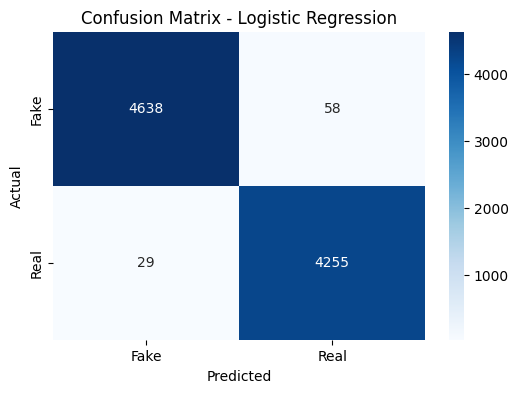

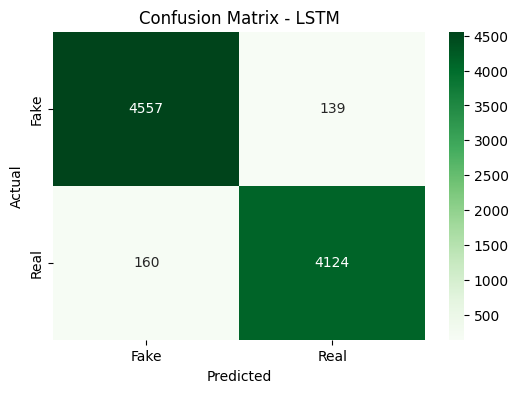

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_lstm = confusion_matrix(y_test, y_pred_lstm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


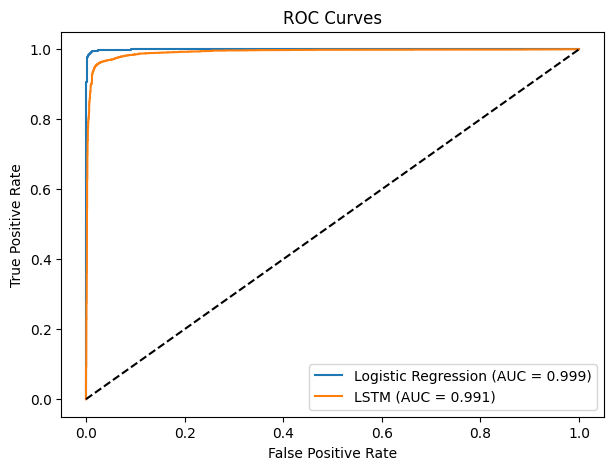

In [53]:
from sklearn.metrics import roc_curve, auc

# LR scores
y_score_lr = clf_lr.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_score_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# LSTM scores
y_score_lstm = model.predict(X_test_pad).ravel()
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_score_lstm)
auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure(figsize=(7, 5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {auc_lstm:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


# **References**

Jurafsky, D. and Martin, J.H. (2021) *Speech and Language Processing*. 3rd ed. Draft version.

Mikolov, T., Chen, K., Corrado, G. and Dean, J. (2013) ‘Efficient estimation of word representations in vector space’, *arXiv preprint*, arXiv:1301.3781.

Shu, K., Sliva, A., Wang, S., Tang, J. and Liu, H. (2017) ‘Fake news detection on social media: A data mining perspective’, *ACM SIGKDD Explorations*, 19(1), pp. 22–36.
